# Correlation analysis report

In [140]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns


In [141]:
#df= pd.read_excel("E:/PC Backup/Others/fiverr/20200430_Correlation/Anonymous_COS Analysis Report_ April 29_2020.xls",skiprows=1)
df= pd.read_excel("E:/PC Backup/Others/fiverr/20200430_Correlation/Anonymous_COS Analysis Report_June 22_2020.xlsx",sheet_name='Full Potential List with TATS' ,skiprows=4)

In [142]:
print('sample data')
df.head(5)

sample data


,ACCOUNTID,Potential Owner,TATS,Lead Source,Score,Stage,Crop Value,Applying for Credit,Country Of Opps,Amount
0,zcrm_906798000014914022,RM,100,Partner Referral,6,10. Sale Won,Med Val,Yes,Flagship,114628.00
1,zcrm_906798000014914022,RM,60,Partner Referral,6,10. Sale Won,Med Val,Yes,Flagship,583814.68
2,zcrm_906798000017227007,MB,60,Repeat Business,5,10. Sale Won,High Val,No,Flagship,44587.25
3,zcrm_906798000021612349,SW,55,Referral,40,10. Sale Won,High Val,Not Eligible,Flagship,107813.02
4,zcrm_906798000025876052,SW,55,Employee Referral,11,3. Quote Delivered,Med Val,Yes,Flagship,50000.00


In [143]:
print('list of columns')
df.columns

list of columns


Index(['ACCOUNTID', 'Potential Owner', 'TATS', 'Lead Source', 'Score', 'Stage',
       'Crop Value', 'Applying for Credit', 'Country Of Opps', 'Amount'],
      dtype='object')

In [144]:
#outlier adjusting the data
df_outlier_adj= df
numeric= 'TATS'
df_outlier_adj.loc[df[numeric]> df[numeric].quantile(0.95),numeric]=df[numeric].quantile(0.95)

In [181]:
def data_transform(df, numeric, categorical):
    df[categorical]= df[categorical].astype('category')
    category_list= df[categorical].cat.categories.tolist()
    data_list=[]
    
    for c in category_list:
        data_list.append(df[df[categorical]==c][numeric])
    
    return data_list

## 1) Analysis of 'TATS' with 'Potential Owner'

In [182]:

numeric= 'TATS'
categoric= 'Potential Owner'

data_list= data_transform(df, numeric= numeric,
categorical= categoric)
    
    

#### Applying statistical test 

In [183]:
from scipy import stats
print("number of categories= "+str(len(data_list)))
stats.kruskal(data_list[0],data_list[1],data_list[2],data_list[3],data_list[4],data_list[5])

number of categories= 6


KruskalResult(statistic=1.7049391633105635, pvalue=0.8882769223525839)

#### Median value of TATS per category

In [184]:
median_time=df.groupby(categoric).agg({numeric:'median'}).reset_index()
median_time

,Potential Owner,TATS
0,Fern,20.0
1,MB,10.5
2,PR,9.5
3,RM,10.0
4,SW,8.0
5,TC,15.0


Text(0.5, 1.0, 'Distribution of TATS with Potential Owner')

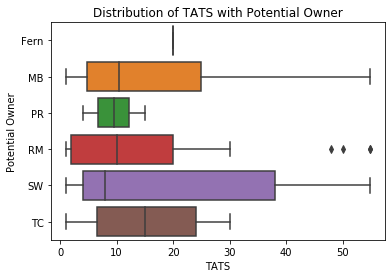

In [185]:
sns.boxplot(y=categoric, x=numeric, data= df_outlier_adj)
text= "Distribution of "+numeric+" with "+categoric
plt.title(text)


Text(0.5, 1.0, 'Median value of TATS for each category of Potential Owner')

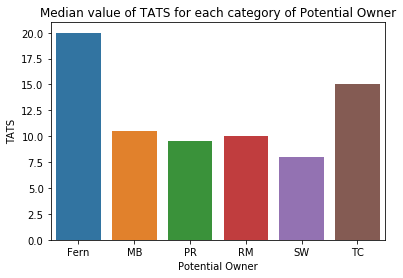

In [186]:
sns.barplot(x= categoric,y= numeric,data= median_time)
plt.title('Median value of '+numeric+' for each category of '+categoric)

#### Inference
Median time spent is not significantly different for different Potential owner category

## 2) Analysis of 'TATS' with 'Lead Source'

In [187]:
numeric= 'TATS'
categoric= 'Lead Source'

data_list= data_transform(df, numeric= numeric,
categorical= categoric)
    

#### Applying statistical test 

In [188]:
from scipy import stats
print("number of categories= "+str(len(data_list)))
stats.kruskal(data_list[0],data_list[1],data_list[2],data_list[3],data_list[4],data_list[5],data_list[6],data_list[7],data_list[8],data_list[9],data_list[10])

number of categories= 11


KruskalResult(statistic=25.07054729568026, pvalue=0.0052133766014078224)

#### Median value of TATS per category

In [189]:
median_time=df.groupby(categoric).agg({numeric:'median'}).reset_index()
median_time

,Lead Source,TATS
0,Cold Call,1.0
1,Direct Phone Enquiry,2.0
2,Employee Referral,10.0
3,Fairs/Event/Seminar,15.0
4,LinkedIn,4.0
5,Partner Referral,15.0
6,Referral,17.0
7,Repeat Business,27.5
8,Unknown/External Referral,20.0
9,Web Research,3.0


Text(0.5, 1.0, 'Distribution of TATS with Lead Source')

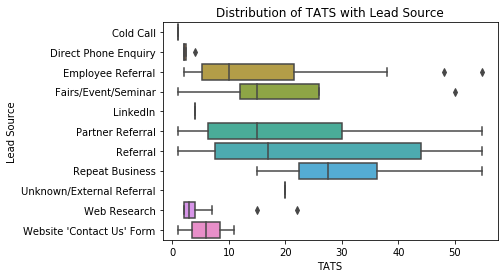

In [190]:
sns.boxplot(y=categoric, x=numeric, data= df_outlier_adj)
text= "Distribution of "+numeric+" with "+categoric
plt.title(text)

Text(0.5, 1.0, 'Median value of TATS for each category of Lead Source')

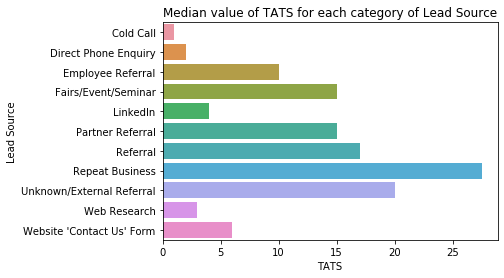

In [191]:
sns.barplot(y= categoric,x= numeric,data= median_time)
plt.title('Median value of '+numeric+' for each category of '+categoric)

#### Inference
Median time spent is significantly different for different categories

## 3) Analysis of 'TATS' with 'Stage'

In [192]:
numeric= 'TATS'
categoric= 'Stage'

data_list= data_transform(df, numeric= numeric,
categorical= categoric)
    

#### Applying statistical test 

In [193]:
from scipy import stats
print("number of categories= "+str(len(data_list)))
stats.kruskal(data_list[0],data_list[1],data_list[2],data_list[3],data_list[4],data_list[5], data_list[6],data_list[7],data_list[8],data_list[9],data_list[10])

number of categories= 11


KruskalResult(statistic=27.97073017056687, pvalue=0.0018248300788438854)

#### Median value of TATS per category

In [194]:
order= ['1. Value Proposition','2. Proposal Development','3. Quote Delivered',
        '4. Negotiation','5. Grant Application','7. Due Diligence',
    '8. Contract Issued','9. Contract Signed','10. Sale Won',
'11. On Hold','12. Closed Lost']

median_time=df.groupby(categoric).agg({numeric:'median'}).reset_index()
median_time



,Stage,TATS
0,1. Value Proposition,3.0
1,10. Sale Won,25.0
2,11. On Hold,30.0
3,12. Closed Lost,6.0
4,2. Proposal Development,7.0
5,3. Quote Delivered,4.0
6,4. Negotiation,5.0
7,5. Grant Application,22.0
8,7. Due Diligence,4.0
9,8. Contract Issued,14.0


Text(0.5, 1.0, 'Distribution of TATS with Stage')

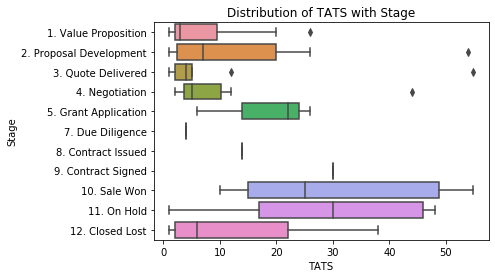

In [195]:

sns.boxplot(y=categoric, x=numeric, data= df_outlier_adj, order= order)
text= "Distribution of "+numeric+" with "+categoric
plt.title(text)


Text(0.5, 1.0, 'Median value of TATS for each category of Stage')

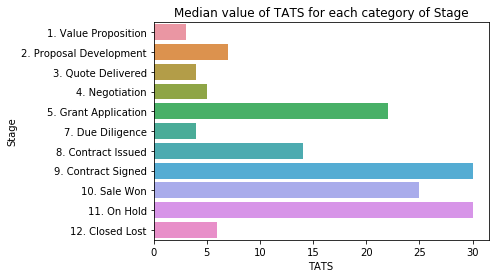

In [196]:
sns.barplot(y= categoric,x= numeric,data= median_time, order= order)
plt.title('Median value of '+numeric+' for each category of '+categoric)

#### Inference
Median time spent is different for different categories

## 4) Analysis of 'TATS' with 'Crop Value'

In [197]:
numeric= 'TATS'  
categoric= 'Crop Value'  

data_list= data_transform(df, numeric= numeric,
categorical= categoric)
    

#### Applying statistical test 

In [198]:
from scipy import stats
print("number of categories= "+str(len(data_list)))
stats.kruskal(data_list[0],data_list[1],data_list[2])

number of categories= 3


KruskalResult(statistic=6.41329467133404, pvalue=0.04049214251502794)

#### Median value of TATS per category

In [199]:
median_time=df.groupby(categoric).agg({numeric:'median'}).sort_values(numeric,ascending=False).reset_index()
median_time
df.groupby(categoric).size()

Crop Value
High Val    26
Low Val      6
Med Val     45
dtype: int64

Text(0.5, 1.0, 'Distribution of TATS with Crop Value')

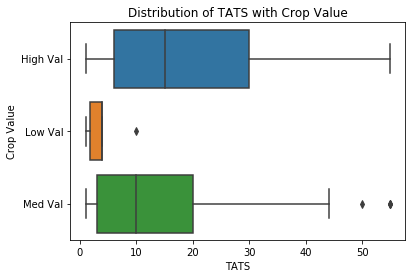

In [200]:
order=['Low Val','Med Val','High Val','']
sns.boxplot(y=categoric, x=numeric, data= df)
text= "Distribution of "+numeric+" with "+categoric
plt.title(text)

Text(0.5, 1.0, 'Median value of TATS for each category of Crop Value')

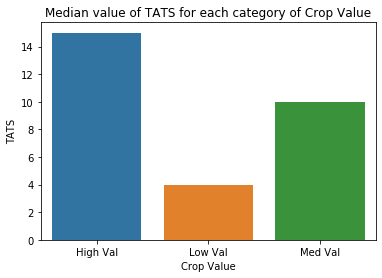

In [201]:
sns.barplot(x= categoric,y= numeric,data= median_time)
plt.title('Median value of '+numeric+' for each category of '+categoric)

#### Inference
Median time spent is significantly different for different categories

## 5) Analysis of 'TATS' with 'Applying for Credit'

In [202]:
numeric= 'TATS'
categoric= 'Applying for Credit'

data_list= data_transform(df, numeric= numeric,
categorical= categoric)
    

#### Applying statistical test 

In [203]:
from scipy import stats
#del str
print("number of categories= "+str(len(data_list)))
stats.kruskal(data_list[1],data_list[2])

number of categories= 3


KruskalResult(statistic=0.024224093970376552, pvalue=0.8763160735548344)

#### Median value of TATS per category

In [204]:
median_time=df.groupby(categoric).agg({numeric:'median'}).sort_values(numeric).reset_index()
median_time


,Applying for Credit,TATS
0,Not Eligible,10.0
1,Yes,14.0
2,No,15.0


Text(0.5, 1.0, 'Distribution of TATS with Applying for Credit')

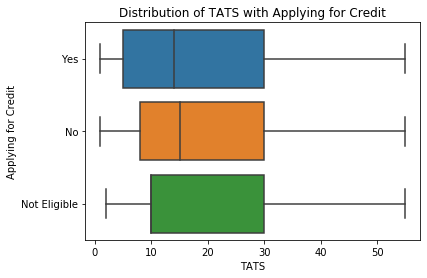

In [206]:
order=['Yes','No','Not Eligible']
sns.boxplot(y=categoric, x=numeric, data= df_outlier_adj, order= order)
text= "Distribution of "+numeric+" with "+categoric
plt.title(text)

Text(0.5, 1.0, 'Median value of TATS for each category of Applying for Credit')

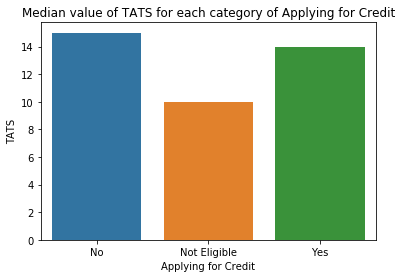

In [207]:
sns.barplot(x= categoric,y= numeric,data= median_time)
plt.title('Median value of '+numeric+' for each category of '+categoric)

#### Inference
Median time spent is independent of whether the customer is applying for credit

## 6) Analysis of 'TATS' with 'Country Of Operations'

In [208]:
numeric= 'TATS'
categoric= 'Country Of Opps'

data_list= data_transform(df, numeric= numeric,
categorical= categoric)
    

#### Applying statistical test 

In [209]:
from scipy import stats
#del str
print("number of categories= "+str(len(data_list)))
stats.kruskal(data_list[1],  data_list[2])

number of categories= 3


KruskalResult(statistic=0.2734211415062469, pvalue=0.6010460196521787)

#### Median value of TATS per category

In [210]:
median_time=df.groupby(categoric).agg({numeric:'median'}).sort_values(numeric).reset_index()
median_time


,Country Of Opps,TATS
0,Not IF Focused,4.0
1,IF Focused,10.0
2,Flagship,10.5


Text(0.5, 1.0, 'Distribution of TATS with Country Of Opps')

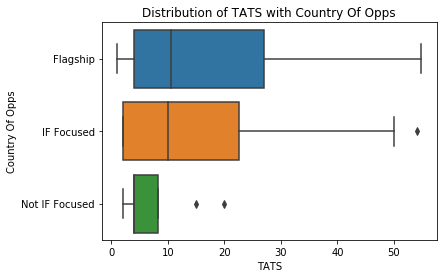

In [211]:

sns.boxplot(y=categoric, x=numeric, data= df_outlier_adj)
text= "Distribution of "+numeric+" with "+categoric
plt.title(text)

Text(0.5, 1.0, 'Median value of TATS for each category of Country Of Opps')

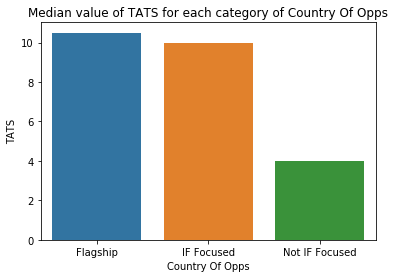

In [212]:
sns.barplot(x= categoric,y= numeric,data= median_time)
plt.title('Median value of '+numeric+' for each category of '+categoric)

#### Inference
Median time spent is for a 'not IF Focused' is less than others

## 7) Analysis of 'TATS' with 'Score'

In [213]:
numeric1= 'TATS'
numeric2= 'Score'

#### Visually exploring the relationship between both variables


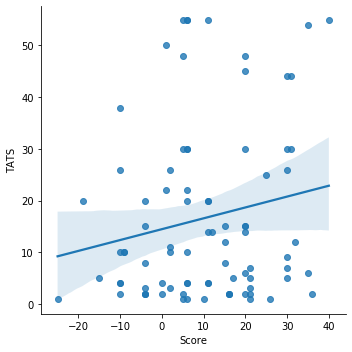

In [214]:
sns.lmplot(x= numeric2, y=numeric1, data= df)


Quantifying the relationship through correlation coefficient

In [215]:
stats.pearsonr(df[numeric1],df[numeric2])

(0.17848575162250502, 0.10428830271833621)

Since, p is not less than .05, we can not reject the null hpothesis  

Both the variables are not significantly correlated

#### Inference
Increasing Score mildly correlates with increasing TATS

## 8) Analysis of 'TATS' with 'Amount'

In [216]:
numeric1= 'TATS'
numeric2= 'Amount'

#### Visually exploring the relationship between both variables


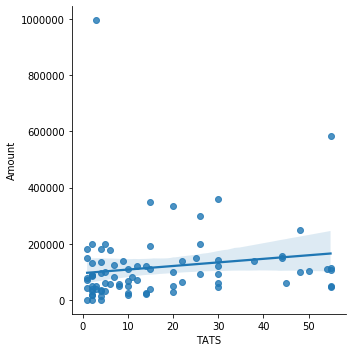

In [217]:

sns.lmplot(x= numeric1, y=numeric2, data= df)


Quantifying the relationship through correlation coefficient

In [218]:
df_na_removed= df[[numeric1,numeric2]].dropna(axis=0)
stats.pearsonr(df_na_removed[numeric1],df_na_removed[numeric2])


(0.15866738088383175, 0.1545120506764831)

Since, p is not less than .05, we can not reject the null hpothesis <br> 
Both the variables are not correlated 

Correlation coefficient is just .158

#### Inference
Time spent and amount is independent